In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from utils import check_missing_values, impute_mmm
import seaborn as sns

In [3]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_pickle('data/event.pkl')
df.head()

,report_number,date_reported,date_occurred,time_occurred,area_code,report_district_number,crime_part,crime_codes,mocodes,victim_age,victim_sex,victim_descent,premises_code,weapon_code,status_code,number_of_crimes
0,190326475,2020-03-01,2020-03-01,21:30,7,784,True,"[510.0, 998.0, nan, nan]",NaN,NaN,True,O,101.0,NaN,AA,2
1,200106753,2020-02-09,2020-02-08,18:00,1,182,True,"[330.0, 998.0, nan, nan]","[1822, 1402, 0344]",47.0,True,O,128.0,NaN,IC,2
2,200320258,2020-11-11,2020-11-04,17:00,3,356,True,"[480.0, nan, nan, nan]","[0344, 1251]",19.0,<NA>,X,502.0,NaN,IC,1
3,200907217,2023-05-10,2020-03-10,20:37,9,964,True,"[343.0, nan, nan, nan]","[0325, 1501]",19.0,True,O,405.0,NaN,IC,1
4,200412582,2020-09-09,2020-09-09,06:30,4,413,True,"[510.0, nan, nan, nan]",NaN,NaN,<NA>,NaN,101.0,NaN,IC,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005028 entries, 0 to 1132580
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   report_number           1005028 non-null  int64   
 1   date_reported           1005028 non-null  object  
 2   date_occurred           1005028 non-null  object  
 3   time_occurred           1005028 non-null  object  
 4   area_code               1005028 non-null  category
 5   report_district_number  1005028 non-null  int64   
 6   crime_part              1005028 non-null  bool    
 7   crime_codes             1005028 non-null  object  
 8   mocodes                 853344 non-null   object  
 9   victim_age              730352 non-null   float64 
 10  victim_sex              762456 non-null   boolean 
 11  victim_descent          860320 non-null   category
 12  premises_code           1005012 non-null  float64 
 13  weapon_code             327228 non-null   float

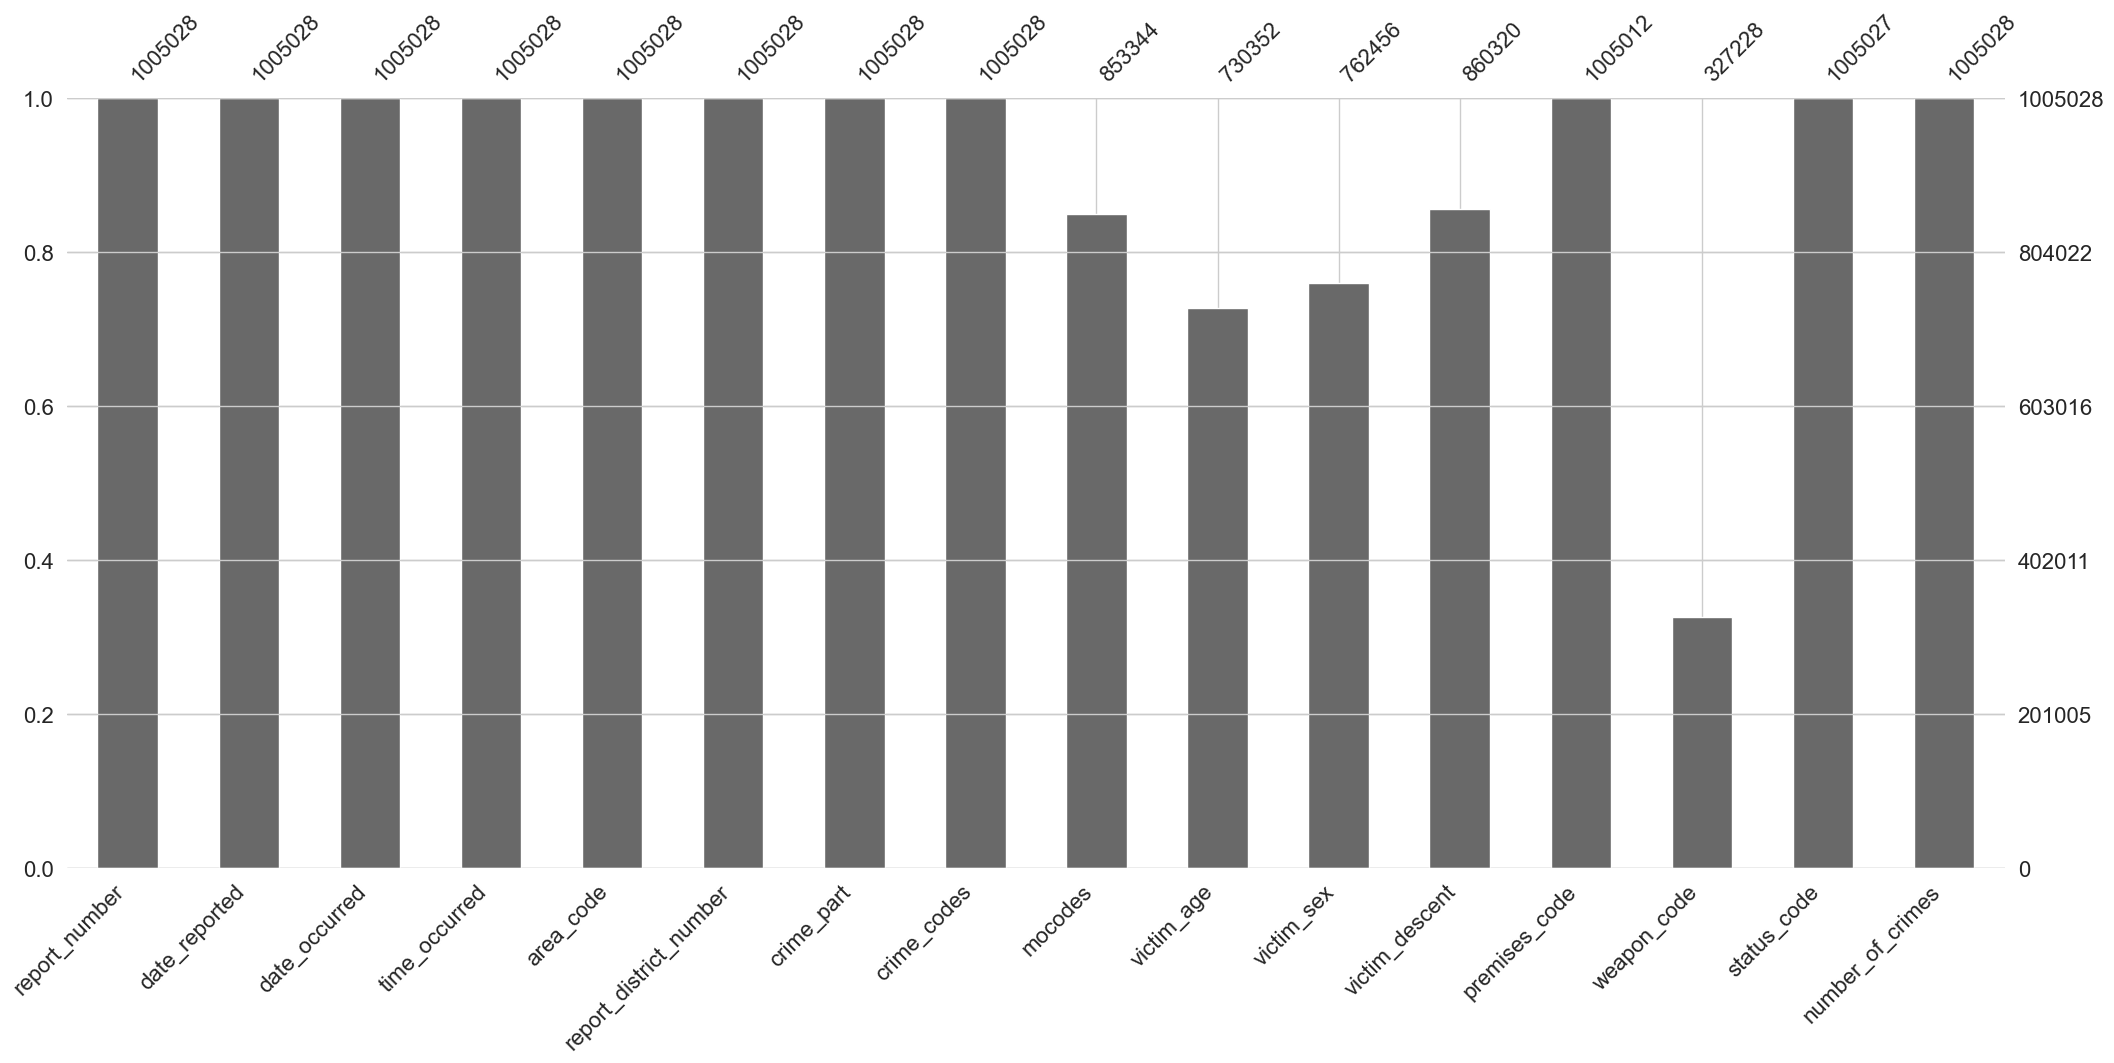

In [6]:
msno.bar(df);

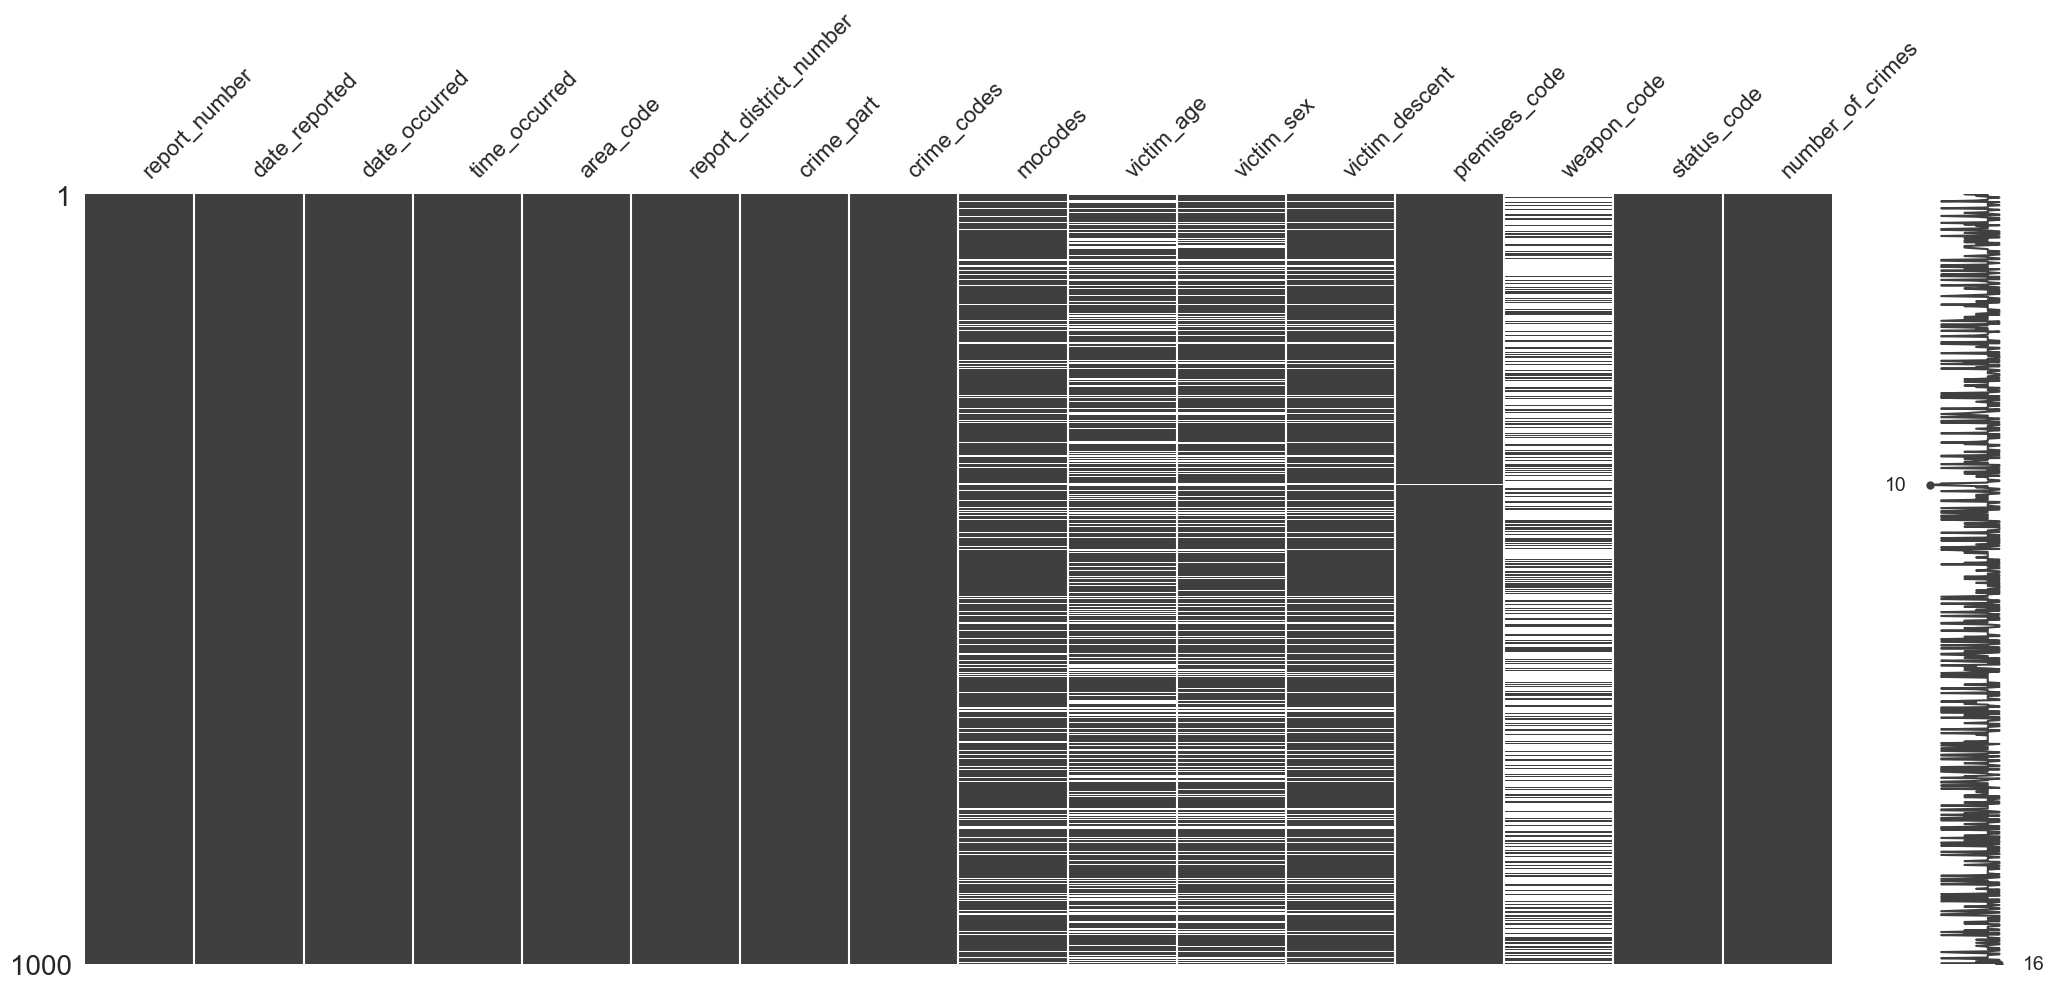

In [7]:
msno.matrix(df.sample(1000));

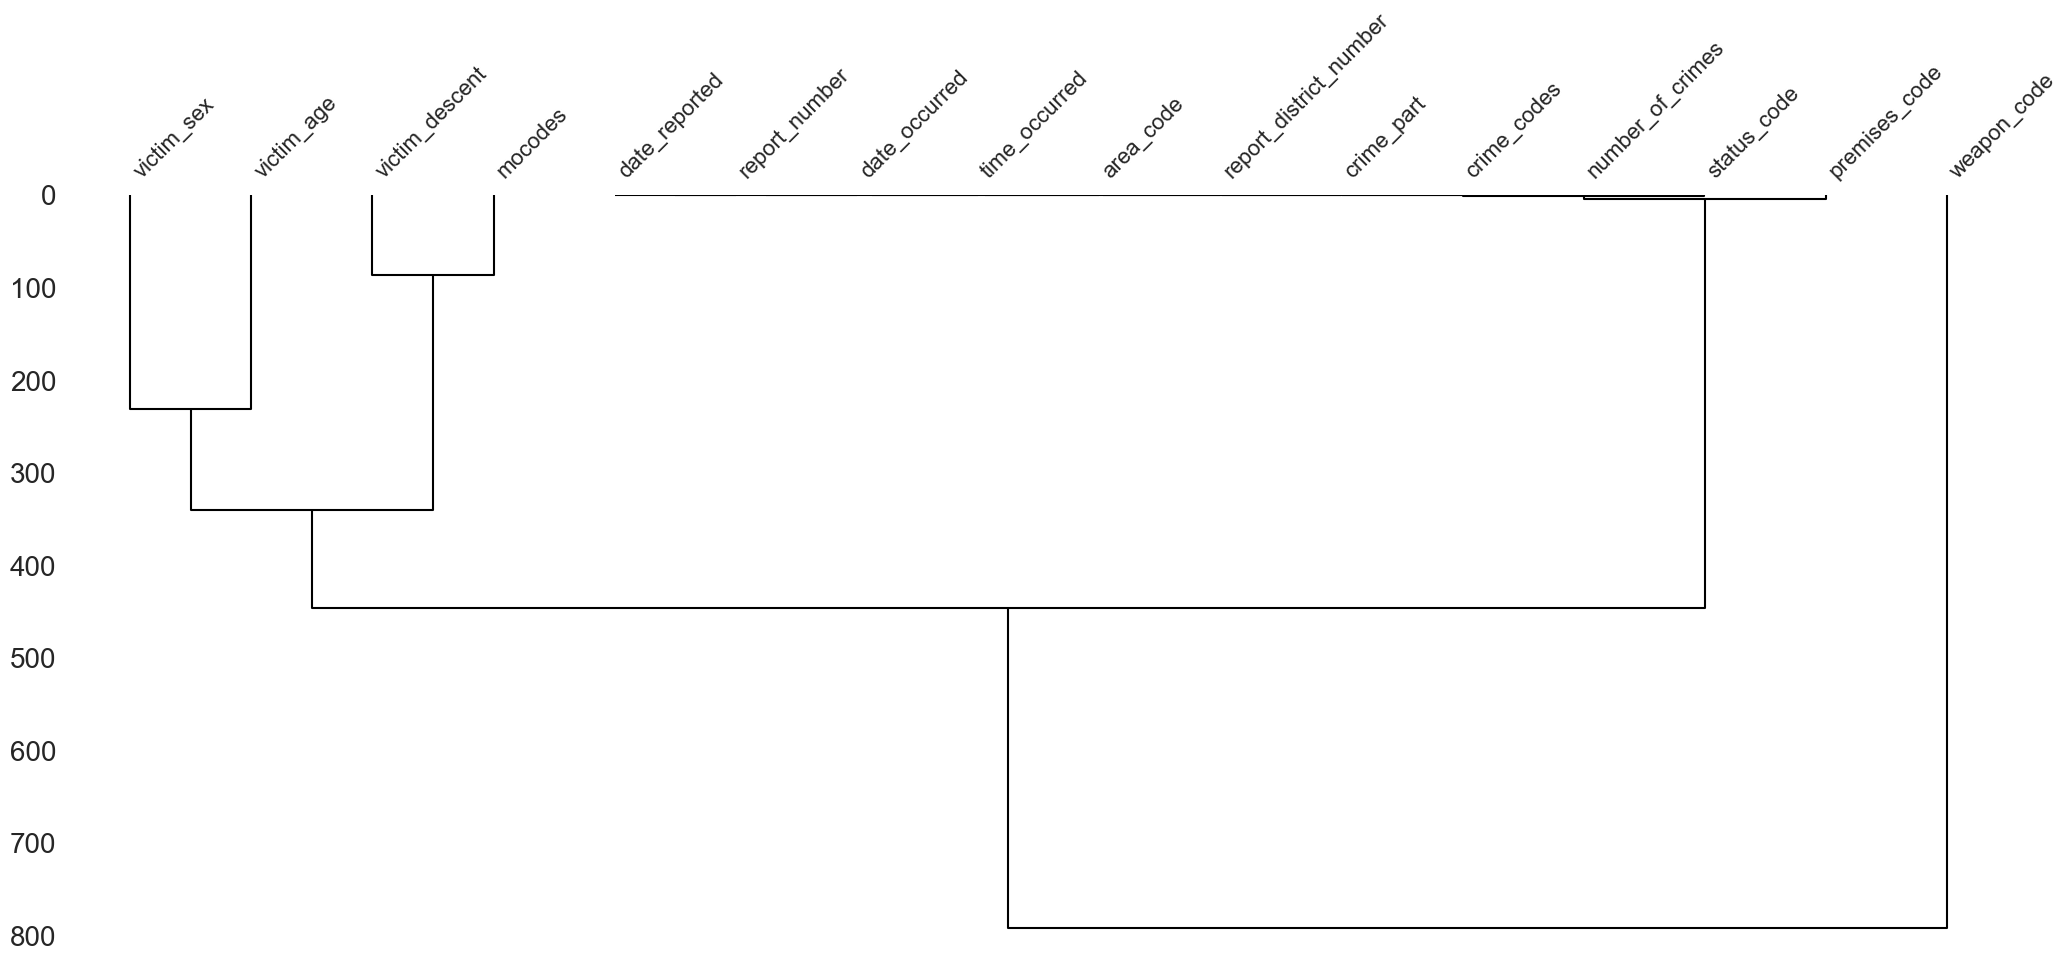

In [8]:
msno.dendrogram(df);

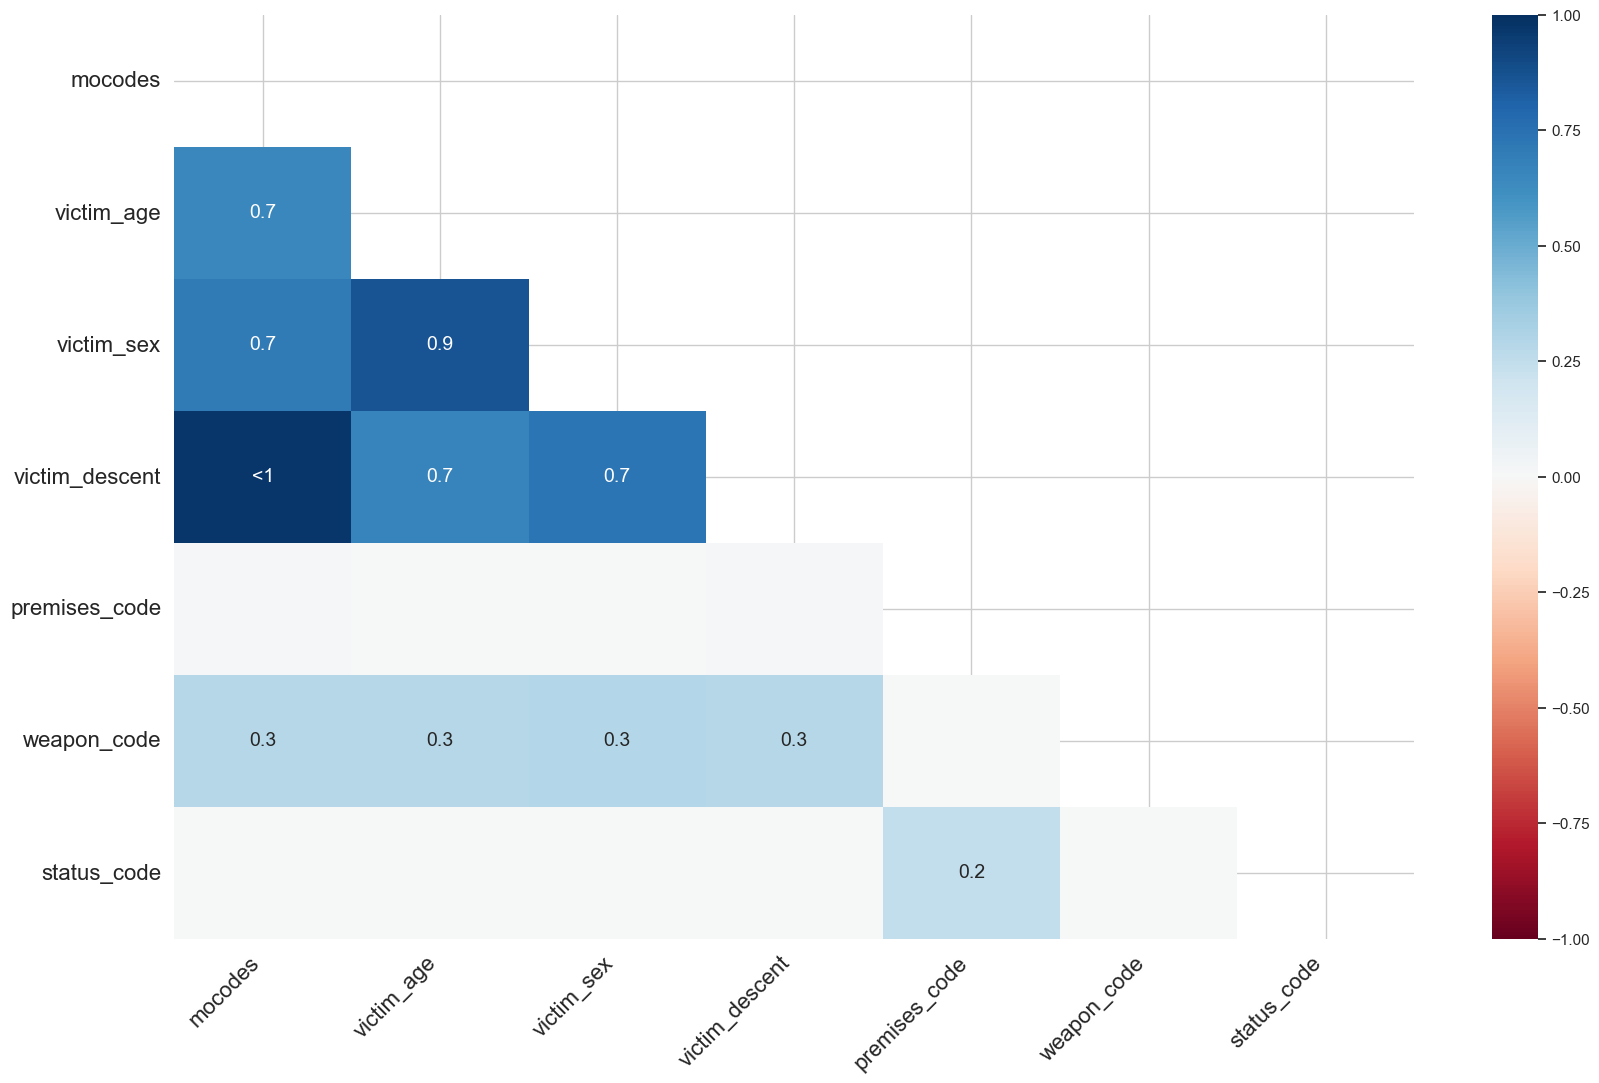

In [9]:
msno.heatmap(df);

In [10]:
check_missing_values(df)

,Missing_Count,Missing_Percentage
report_number,0,0.000000
date_reported,0,0.000000
date_occurred,0,0.000000
time_occurred,0,0.000000
area_code,0,0.000000
report_district_number,0,0.000000
crime_part,0,0.000000
crime_codes,0,0.000000
mocodes,151684,15.092515
victim_age,274676,27.330184


### Weapon Code

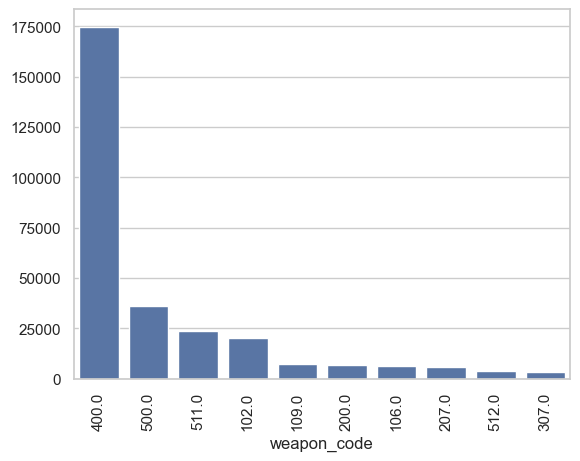

In [11]:
weapon_code_index = df.weapon_code.value_counts().nlargest(10).index
weapon_code_values = df.weapon_code.value_counts().nlargest(10).values
sns.barplot(x=weapon_code_index, y=weapon_code_values, order=weapon_code_index)
plt.xticks(rotation=90)
plt.show();

In [12]:
no_weapon = (0, 'NO WEAPON')
df.weapon_code = df.weapon_code.fillna(no_weapon[0])
df_weapon = pd.read_csv('data/weapon.csv')
if df_weapon.weapon_code.isin([no_weapon[0]]).any():
    print('NO WEAPON already exists in the dataset')
else:
    df_weapon.loc[len(df_weapon)] = [no_weapon[0], no_weapon[1]]
df_weapon.to_csv('data/weapon.csv', index=False)
df.weapon_code.value_counts().nlargest(10)

weapon_code
0.0      677800
400.0    174742
500.0     36386
511.0     23844
102.0     20185
109.0      7267
200.0      6838
106.0      6581
207.0      5881
512.0      3730
Name: count, dtype: int64

### MO Codes

In [13]:
df = df.dropna(subset=['mocodes'])
check_missing_values(df)

,Missing_Count,Missing_Percentage
report_number,0,0.000000
date_reported,0,0.000000
date_occurred,0,0.000000
time_occurred,0,0.000000
area_code,0,0.000000
report_district_number,0,0.000000
crime_part,0,0.000000
crime_codes,0,0.000000
mocodes,0,0.000000
victim_age,128566,15.066140


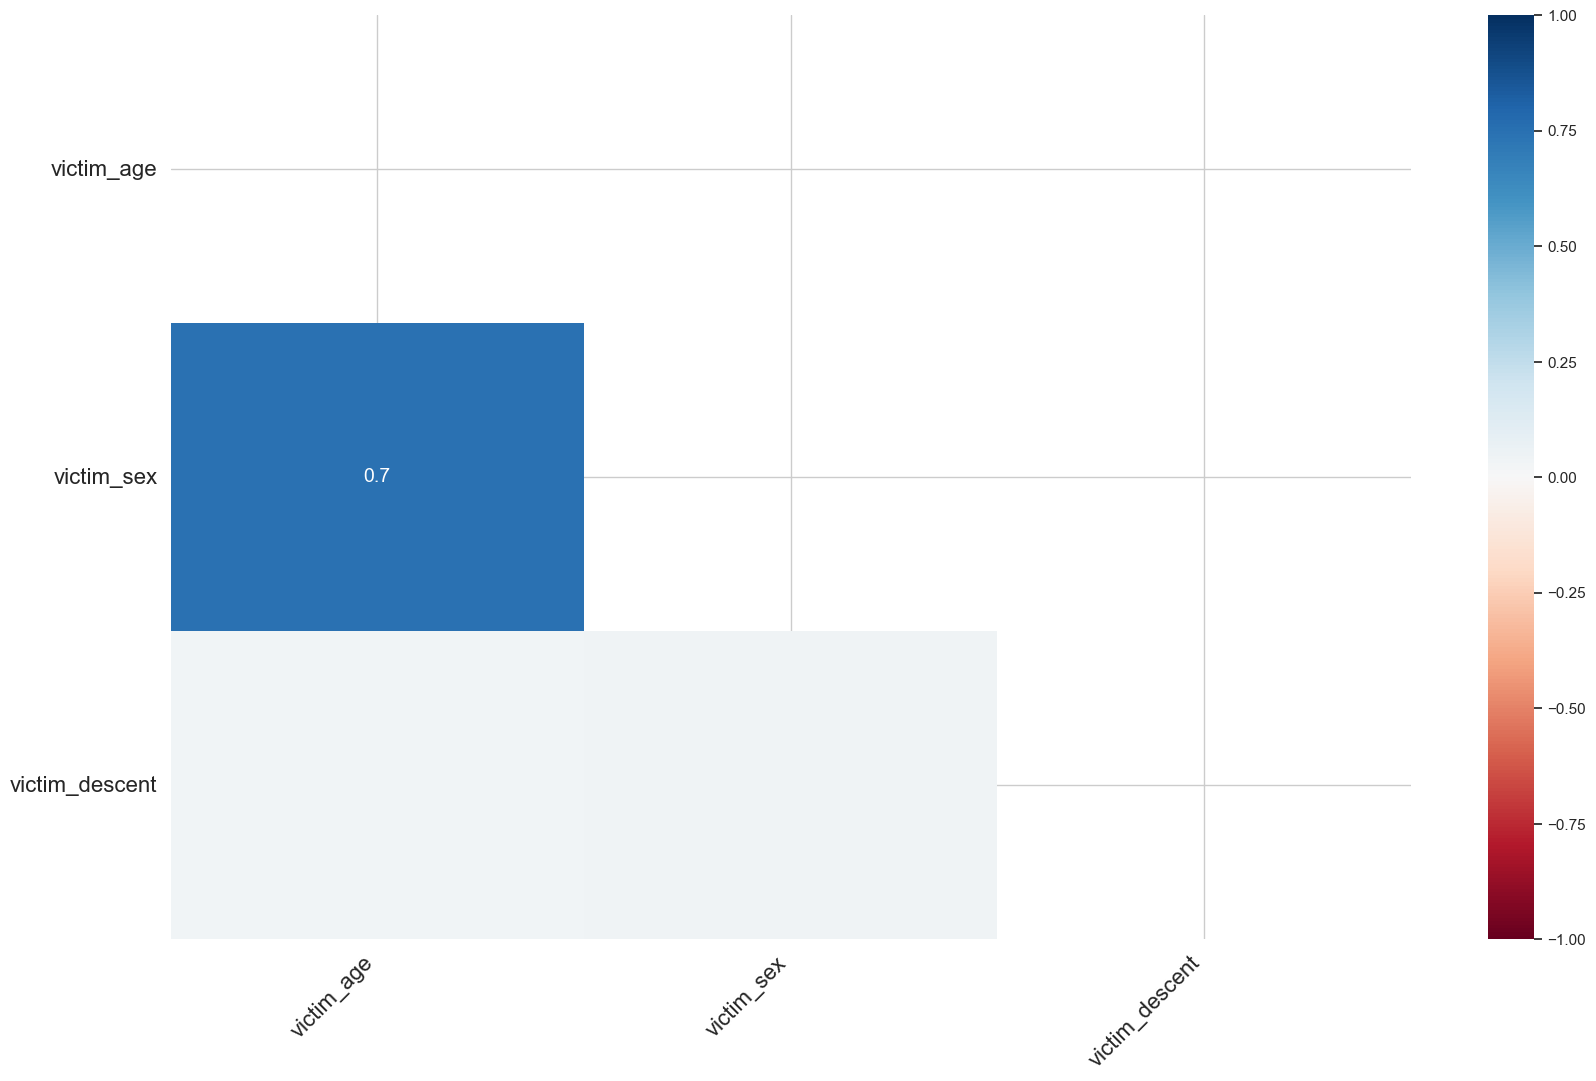

In [14]:
msno.heatmap(df);

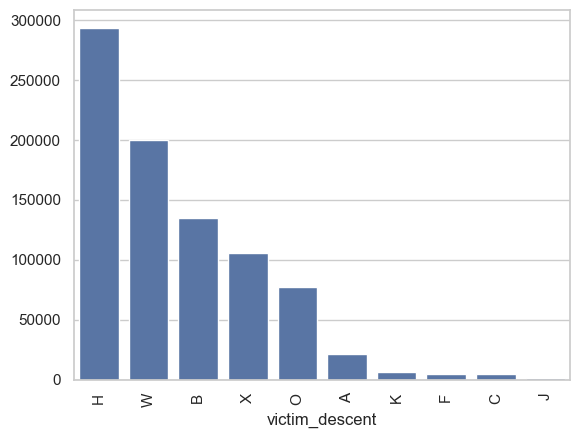

In [15]:
victim_descent_count = df.victim_descent.value_counts().nlargest(10)
victim_descent_index = victim_descent_count.index
victim_descent_values = victim_descent_count.values
sns.barplot(x=victim_descent_index, y=victim_descent_values, order=victim_descent_index)
plt.xticks(rotation=90)
plt.show();

In [16]:
df.victim_descent.value_counts(normalize=True).nlargest(10)

victim_descent
H    0.344564
W    0.234208
B    0.158060
X    0.123797
O    0.090527
A    0.024863
K    0.006994
F    0.005604
C    0.005392
J    0.001841
Name: proportion, dtype: float64

In [17]:
df['is_victim_descent_missing'] = df.victim_descent.isna()

In [18]:
missing_mask = df.victim_descent.isna()
n_missing = missing_mask.sum()
imputed_values = df.victim_descent.dropna().sample(n=n_missing, replace=True, random_state=42)
df.loc[missing_mask, 'victim_descent'] = imputed_values.values
df.victim_descent.isna().sum()

np.int64(0)

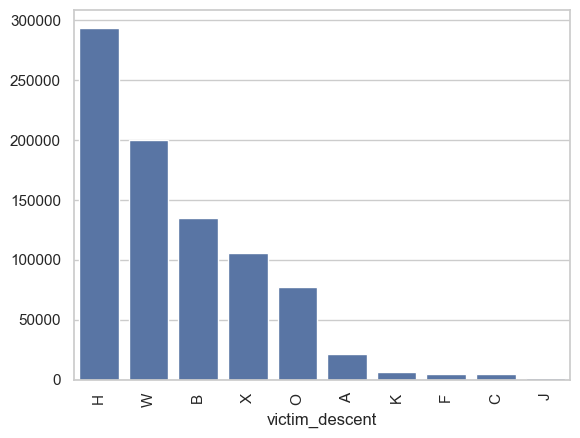

In [19]:
victim_descent_count = df.victim_descent.value_counts().nlargest(10)
victim_descent_index = victim_descent_count.index
victim_descent_values = victim_descent_count.values
sns.barplot(x=victim_descent_index, y=victim_descent_values, order=victim_descent_index)
plt.xticks(rotation=90)
plt.show();

In [20]:
df.victim_descent.value_counts(normalize=True).nlargest(10)

victim_descent
H    0.344549
W    0.234216
B    0.158064
X    0.123808
O    0.090525
A    0.024861
K    0.006992
F    0.005603
C    0.005392
J    0.001841
Name: proportion, dtype: float64

In [21]:
check_missing_values(df)

,Missing_Count,Missing_Percentage
report_number,0,0.000000
date_reported,0,0.000000
date_occurred,0,0.000000
time_occurred,0,0.000000
area_code,0,0.000000
report_district_number,0,0.000000
crime_part,0,0.000000
crime_codes,0,0.000000
mocodes,0,0.000000
victim_age,128566,15.066140


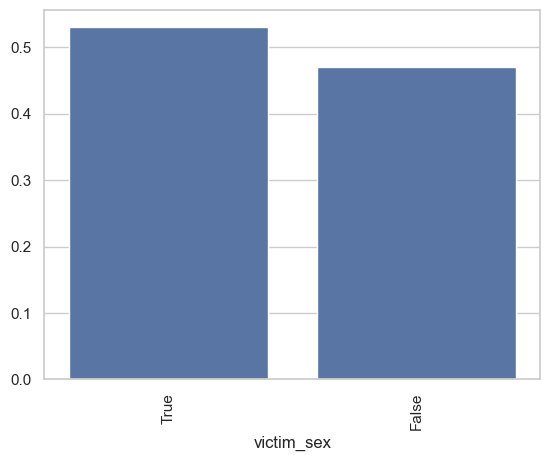

In [22]:
victim_sex_count = df.victim_sex.value_counts(normalize=True)
victim_sex_index = victim_sex_count.index
victim_sex_values = victim_sex_count.values
sns.barplot(x=victim_sex_index, y=victim_sex_values, order=victim_sex_index)
plt.xticks(rotation=90)
plt.show();

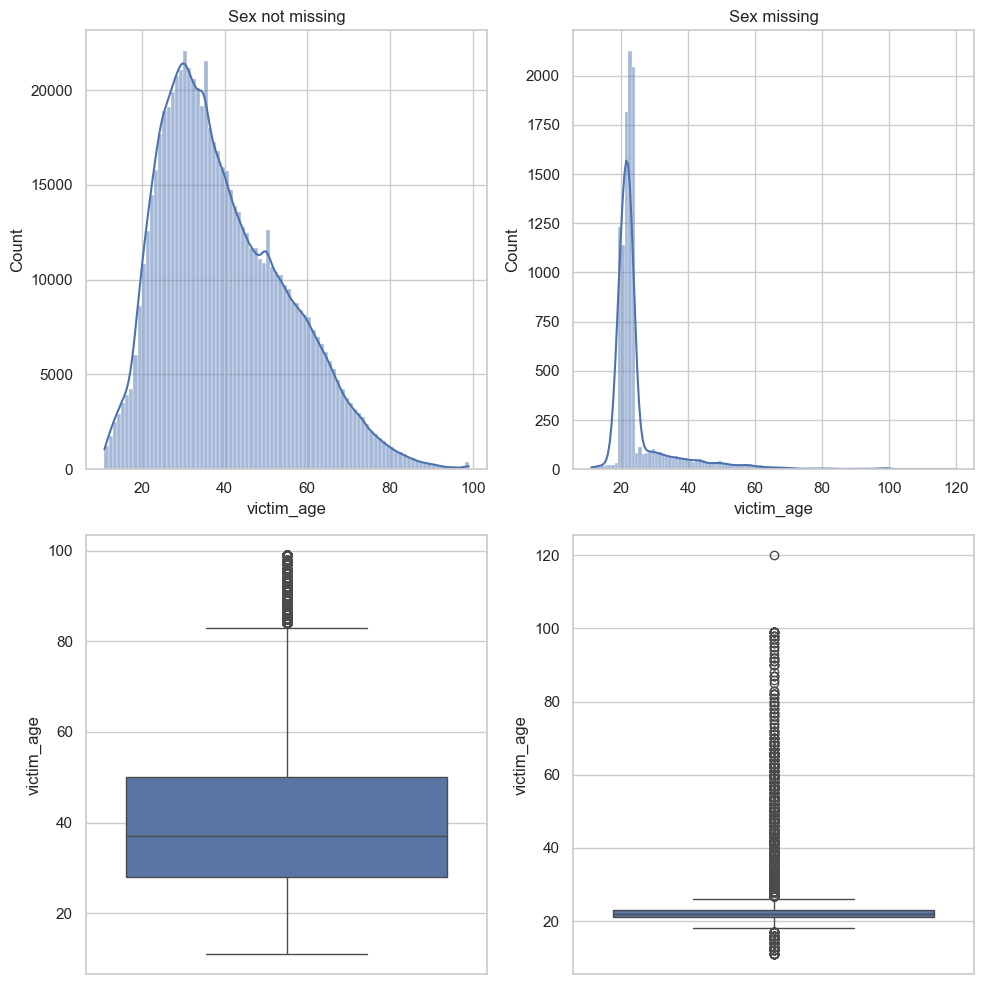

In [23]:
age_with_sex_not_missing = df.loc[df.victim_sex.notna(), 'victim_age']
age_with_sex_missing = df.loc[df.victim_sex.isna(), 'victim_age']
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(age_with_sex_not_missing, 
             kde=True, 
             ax=ax[0, 0], 
             bins=range(
                 age_with_sex_not_missing.min().astype(int),
                 age_with_sex_not_missing.max().astype(int) + 1
             ))
ax[0, 0].set_title('Sex not missing')
sns.histplot(age_with_sex_missing, 
             kde=True, 
             ax=ax[0, 1],
             bins=range(
                 age_with_sex_missing.min().astype(int),
                 age_with_sex_missing.max().astype(int) + 1
             ))
ax[0, 1].set_title('Sex missing')

sns.boxplot(age_with_sex_not_missing, ax=ax[1, 0])
sns.boxplot(age_with_sex_missing, ax=ax[1, 1])
plt.tight_layout()
plt.show()

In [24]:
age_with_sex_missing.describe().round(2), age_with_sex_not_missing.describe().round(2)

(count    10517.00
 mean        24.77
 std          9.86
 min         11.00
 25%         21.00
 50%         22.00
 75%         23.00
 max        120.00
 Name: victim_age, dtype: float64,
 count    714261.00
 mean         39.96
 std          15.33
 min          11.00
 25%          28.00
 50%          37.00
 75%          50.00
 max          99.00
 Name: victim_age, dtype: float64)

In [25]:
victim_sex_filtered = df.query('victim_age >= 20 and victim_age <= 23').victim_sex.value_counts(normalize=True)
victim_sex_filtered

victim_sex
False    0.54092
True     0.45908
Name: proportion, dtype: Float64

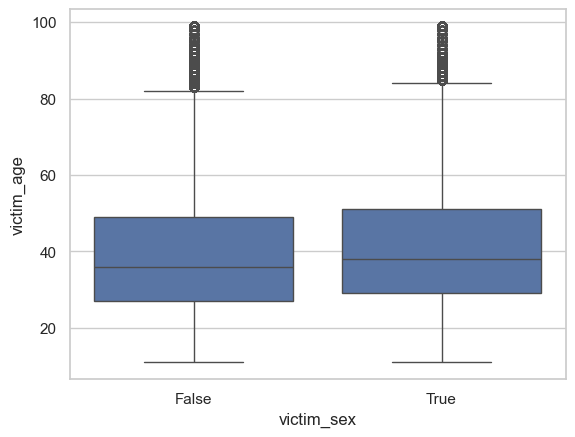

In [26]:
sns.boxplot(x='victim_sex', y='victim_age', data=df.dropna(subset=['victim_sex', 'victim_age']))
plt.show()

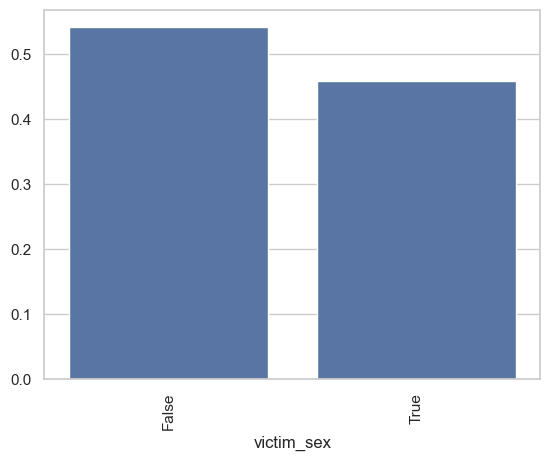

In [27]:
victim_sex_index = victim_sex_filtered.index
victim_sex_values = victim_sex_filtered.values
sns.barplot(x=victim_sex_index, y=victim_sex_values, order=victim_sex_filtered.index)
plt.xticks(rotation=90)
plt.show();

In [28]:
df['is_victim_sex_missing'] = df.victim_sex.isna()
df.head()

,report_number,date_reported,date_occurred,time_occurred,area_code,report_district_number,crime_part,crime_codes,mocodes,victim_age,victim_sex,victim_descent,premises_code,weapon_code,status_code,number_of_crimes,is_victim_descent_missing,is_victim_sex_missing
1,200106753,2020-02-09,2020-02-08,18:00,1,182,True,"[330.0, 998.0, nan, nan]","[1822, 1402, 0344]",47.0,True,O,128.0,0.0,IC,2,False,False
2,200320258,2020-11-11,2020-11-04,17:00,3,356,True,"[480.0, nan, nan, nan]","[0344, 1251]",19.0,<NA>,X,502.0,0.0,IC,1,False,True
3,200907217,2023-05-10,2020-03-10,20:37,9,964,True,"[343.0, nan, nan, nan]","[0325, 1501]",19.0,True,O,405.0,0.0,IC,1,False,False
6,200200759,2020-07-07,2020-07-07,13:40,2,265,True,"[648.0, 998.0, nan, nan]","[0329, 1402, 2004, 1501]",NaN,<NA>,X,101.0,0.0,IC,2,False,True
11,200406391,2020-03-02,2020-03-01,14:30,4,407,True,"[310.0, nan, nan, nan]","[0344, 1607]",27.0,True,W,221.0,0.0,IC,1,False,False


In [29]:
victim_sex_filtered = df.query('victim_age >= 20 and victim_age <= 23').victim_sex.dropna() 
missing_mask = df.victim_sex.isna()
n_missing = missing_mask.sum()
imputed_values = victim_sex_filtered.sample(n=n_missing, replace=True, random_state=42)
df.loc[missing_mask, 'victim_sex'] = imputed_values.values
df.victim_sex.isna().sum()

np.int64(0)

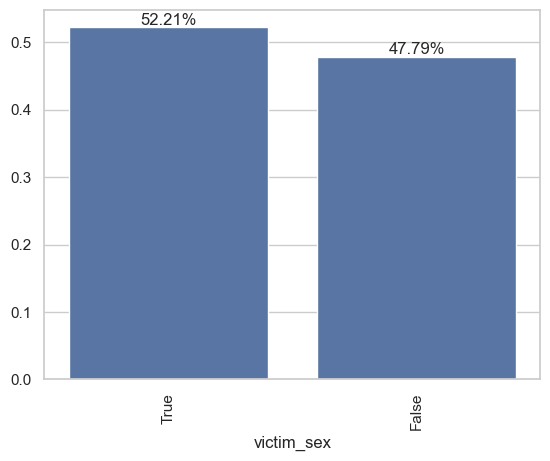

In [30]:
victim_sex_count = df.victim_sex.value_counts(normalize=True)
victim_sex_index = victim_sex_count.index
victim_sex_values = victim_sex_count.values
ax = sns.barplot(x=victim_sex_index, y=victim_sex_values, order=victim_sex_index)
plt.xticks(rotation=90)
for i, value in enumerate(victim_sex_values):
    ax.text(i, value, f'{value:.2%}', ha='center', va='bottom')
plt.show();

### Age

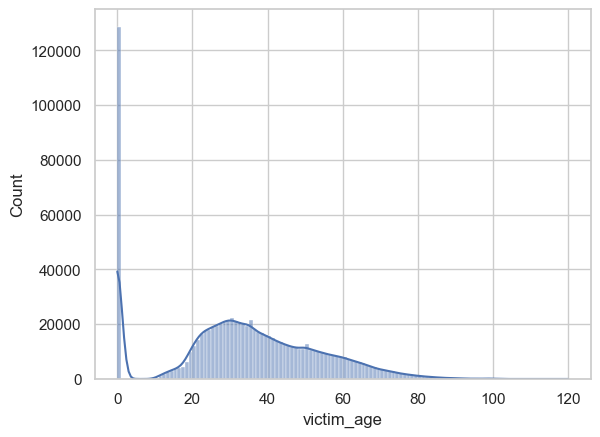

In [31]:
age_with_missing = df.victim_age.fillna(0).astype('uint8')
sns.histplot(age_with_missing, kde=True, bins=range(0, age_with_missing.max() + 1))
plt.show()

In [32]:
impute_mmm(df.victim_age)

,Value,Count,Percentage
Statistics,,,
Mean,39.737929,0,0.000000
Median,37.000000,17303,2.387352
Mode,30.000000,22135,3.054039
Mean without Outliers,39.441479,0,0.000000
Median without Outliers,37.000000,17303,2.401710
Mode without Outliers,30.000000,22135,3.072407


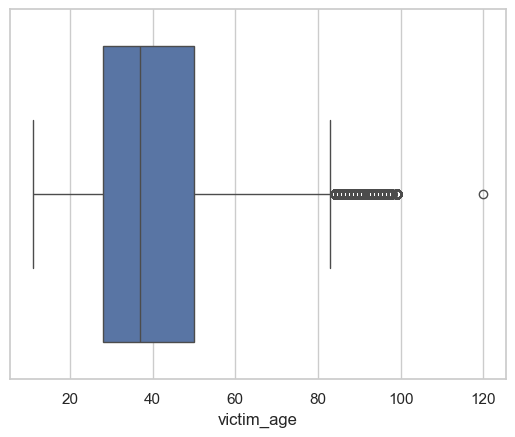

In [33]:
sns.boxplot(x='victim_age', data=df);

In [34]:
df['is_victim_age_missing'] = df.victim_age.isna()

In [35]:
df['victim_age_with_median_imputation'] = df.victim_age.fillna(df.victim_age.median())

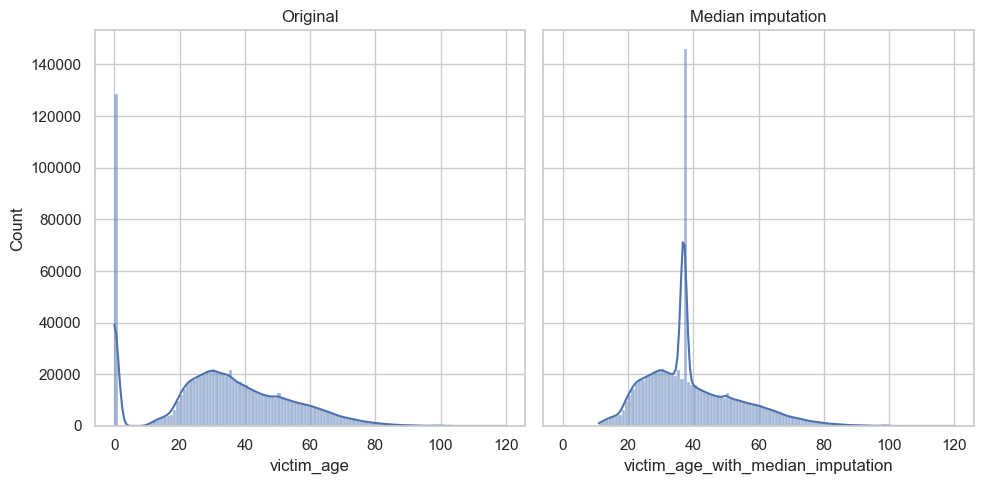

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
bins = (0, int(age_with_missing.max()) + 1)
sns.histplot(age_with_missing, kde=True, ax=ax[0], bins=range(*bins))
ax[0].set_title('Original')
sns.histplot(df.victim_age_with_median_imputation, kde=True, ax=ax[1], bins=range(*bins))
ax[1].set_title('Median imputation')
plt.tight_layout()
plt.show();

In [37]:
df.head()

,report_number,date_reported,date_occurred,time_occurred,area_code,report_district_number,crime_part,crime_codes,mocodes,victim_age,victim_sex,victim_descent,premises_code,weapon_code,status_code,number_of_crimes,is_victim_descent_missing,is_victim_sex_missing,is_victim_age_missing,victim_age_with_median_imputation
1,200106753,2020-02-09,2020-02-08,18:00,1,182,True,"[330.0, 998.0, nan, nan]","[1822, 1402, 0344]",47.0,True,O,128.0,0.0,IC,2,False,False,False,47.0
2,200320258,2020-11-11,2020-11-04,17:00,3,356,True,"[480.0, nan, nan, nan]","[0344, 1251]",19.0,True,X,502.0,0.0,IC,1,False,True,False,19.0
3,200907217,2023-05-10,2020-03-10,20:37,9,964,True,"[343.0, nan, nan, nan]","[0325, 1501]",19.0,True,O,405.0,0.0,IC,1,False,False,False,19.0
6,200200759,2020-07-07,2020-07-07,13:40,2,265,True,"[648.0, 998.0, nan, nan]","[0329, 1402, 2004, 1501]",NaN,False,X,101.0,0.0,IC,2,False,True,True,37.0
11,200406391,2020-03-02,2020-03-01,14:30,4,407,True,"[310.0, nan, nan, nan]","[0344, 1607]",27.0,True,W,221.0,0.0,IC,1,False,False,False,27.0


In [38]:
df['victim_age_with_random_imputation'] = df.victim_age
missing_mask = df.victim_age_with_random_imputation.isna()
n_missing = missing_mask.sum()
imputed_values = df.victim_age.dropna().sample(n=n_missing, replace=True, random_state=42)
df.loc[missing_mask, 'victim_age_with_random_imputation'] = imputed_values.values
df.victim_age_with_random_imputation.isna().sum()

np.int64(0)

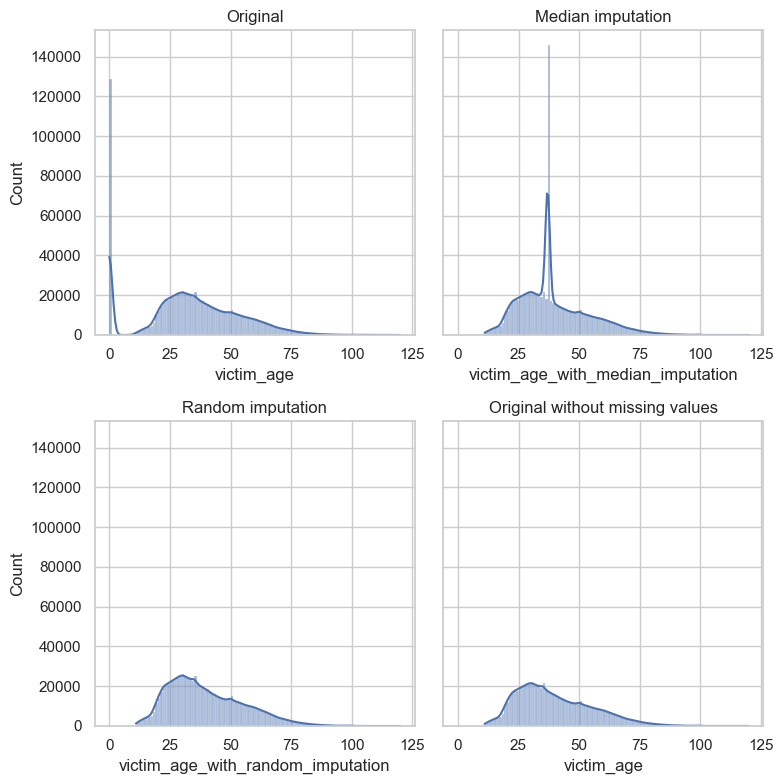

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
bins = (0, int(age_with_missing.max()) + 1)
sns.histplot(age_with_missing, kde=True, ax=ax[0, 0], bins=range(*bins))
ax[0, 0].set_title('Original')
sns.histplot(df.victim_age_with_median_imputation, kde=True, ax=ax[0, 1], bins=range(*bins))
ax[0, 1].set_title('Median imputation')
sns.histplot(df.victim_age_with_random_imputation, kde=True, ax=ax[1, 0], bins=range(*bins))
ax[1, 0].set_title('Random imputation')
sns.histplot(df.victim_age, kde=True, ax=ax[1, 1], bins=range(*bins))
ax[1, 1].set_title('Original without missing values')
plt.tight_layout()
plt.show();

In [40]:
df[['victim_age', 'victim_age_with_median_imputation', 'victim_age_with_random_imputation']].describe().round(2)

,victim_age,victim_age_with_median_imputation,victim_age_with_random_imputation
count,724778.00,853344.00,853344.00
mean,39.74,39.33,39.74
std,15.37,14.20,15.37
min,11.00,11.00,11.00
25%,28.00,29.00,28.00
50%,37.00,37.00,37.00
75%,50.00,47.00,50.00
max,120.00,120.00,120.00


In [41]:
df.victim_age = df.victim_age_with_random_imputation
df = df.drop(columns=['victim_age_with_median_imputation', 'victim_age_with_random_imputation'])
df.head()

,report_number,date_reported,date_occurred,time_occurred,area_code,report_district_number,crime_part,crime_codes,mocodes,victim_age,victim_sex,victim_descent,premises_code,weapon_code,status_code,number_of_crimes,is_victim_descent_missing,is_victim_sex_missing,is_victim_age_missing
1,200106753,2020-02-09,2020-02-08,18:00,1,182,True,"[330.0, 998.0, nan, nan]","[1822, 1402, 0344]",47.0,True,O,128.0,0.0,IC,2,False,False,False
2,200320258,2020-11-11,2020-11-04,17:00,3,356,True,"[480.0, nan, nan, nan]","[0344, 1251]",19.0,True,X,502.0,0.0,IC,1,False,True,False
3,200907217,2023-05-10,2020-03-10,20:37,9,964,True,"[343.0, nan, nan, nan]","[0325, 1501]",19.0,True,O,405.0,0.0,IC,1,False,False,False
6,200200759,2020-07-07,2020-07-07,13:40,2,265,True,"[648.0, 998.0, nan, nan]","[0329, 1402, 2004, 1501]",30.0,False,X,101.0,0.0,IC,2,False,True,True
11,200406391,2020-03-02,2020-03-01,14:30,4,407,True,"[310.0, nan, nan, nan]","[0344, 1607]",27.0,True,W,221.0,0.0,IC,1,False,False,False


In [42]:
check_missing_values(df)

,Missing_Count,Missing_Percentage
report_number,0,0.0
date_reported,0,0.0
date_occurred,0,0.0
time_occurred,0,0.0
area_code,0,0.0
report_district_number,0,0.0
crime_part,0,0.0
crime_codes,0,0.0
mocodes,0,0.0
victim_age,0,0.0


In [43]:
df.to_pickle('data/event.pkl')